In [54]:
import pandas as pd
import numpy as np


In [81]:
from sklearn.datasets import load_boston

dt= load_boston()
X=dt.data
Y=dt.target


In [56]:
df_x=pd.DataFrame(X,columns=dt.feature_names)
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
df_y=pd.DataFrame(Y,columns=["target"])
df_y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [58]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2) # 

# Model train and test

In [90]:
#Import knearest neighbors Classifier model

from sklearn.neighbors import KNeighborsRegressor

#Create KNN Classifier
knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                    weights='uniform')

#Train the model using the training sets
knn.fit(X_train, y_train)


#Predict the response for test dataset

knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                    weights='uniform')

In [86]:
#Import knearest neighbors Classifier model

from sklearn.neighbors import KNeighborsRegressor

#Create KNN Classifier
knn2 = KNeighborsRegressor(n_neighbors=7,weights='distance')



#Train the model using the training sets
knn2.fit(X_train, y_train)


#Predict the response for test dataset

knn2

#improve performance---

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')

In [87]:
y_pred1 = knn.predict(X_test)
y_pred1


y_pred2 = knn2.predict(X_test)
y_pred2

# ---   y_pred1-y_test==error 

array([[24.50528695],
       [22.15036781],
       [16.71746687],
       [24.68612925],
       [20.62112229],
       [22.62735727],
       [22.20663651],
       [24.40707656],
       [26.25678137],
       [22.48208423],
       [25.53200883],
       [22.93465098],
       [21.59180259],
       [21.46810515],
       [33.38636292],
       [16.79385771],
       [13.92669779],
       [15.23361561],
       [11.54607887],
       [22.655738  ],
       [33.15941131],
       [21.20477869],
       [24.82601114],
       [23.97754371],
       [28.83956914],
       [23.5958607 ],
       [26.27675182],
       [37.27438855],
       [18.53893465],
       [22.0594525 ],
       [20.63362131],
       [20.56585329],
       [35.64832389],
       [25.46537758],
       [25.71575967],
       [21.20738541],
       [11.75458761],
       [21.44921701],
       [32.5428878 ],
       [21.80201188],
       [36.82710055],
       [11.07701459],
       [22.75527196],
       [24.86206702],
       [39.99673974],
       [25

In [88]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
#RMSE=sqrt(MSE)

import matplotlib.pyplot as plt
%matplotlib inline
actual=y_test

In [89]:
error1 = sqrt(mean_squared_error(actual,y_pred1)) #calculate rmse
error1



5.515006380894805

In [64]:
error2 = sqrt(mean_squared_error(y_test,y_pred2)) #calculate rmse
error2

5.091021633523131

In [97]:
from sklearn import metrics
print("Accuracy:",metrics.r2_score(y_test, y_pred))


Accuracy: -0.5737923128020574


In [100]:
#GridSearch CV

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,3,5,7,9,11,21]}

knn1 = KNeighborsRegressor(n_neighbors=1)
knn2 = KNeighborsRegressor(n_neighbors=3)
knn3 = KNeighborsRegressor(n_neighbors=5)
knn4 = KNeighborsRegressor(n_neighbors=7)
knn5 = KNeighborsRegressor(n_neighbors=9)
knn6 = KNeighborsRegressor(n_neighbors=11)
knn7 = KNeighborsRegressor(n_neighbors=21)


model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

model


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn = KNeighborsRegressor(n_neighbours=3)

KFold(knn, cv=5)

In [101]:
model.cv_results_

{'mean_fit_time': array([0.01758809, 0.01019416, 0.01059418, 0.01059384, 0.01179323,
        0.0099947 , 0.01139021]),
 'std_fit_time': array([0.00426935, 0.00312124, 0.00174178, 0.0026537 , 0.0049516 ,
        0.00063166, 0.00286708]),
 'mean_score_time': array([0.01958981, 0.00859575, 0.01099653, 0.01119127, 0.0101934 ,
        0.01059594, 0.01259298]),
 'std_score_time': array([0.0092603 , 0.00257415, 0.00167354, 0.00271079, 0.00324766,
        0.00048932, 0.00462795]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 21],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 21}],
 'split0_test_score': array([0.27915292, 0.59056521, 0.46727662, 0.37211946, 0.34624141,
        0.34184971, 0.29704771]),
 'split1_test_score': array([0.43757596, 0.54

In [102]:

print(model.best_params_,model.best_score_,model.best_estimator_)

{'n_neighbors': 3} 0.43285122306184354 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')


In [105]:
#GridSearch CV

from sklearn.model_selection import GridSearchCV
params = {'weights':['uniform','distance'],
         'n_neighbors':[1,3,5,7,9]}

knn = KNeighborsRegressor()



model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)

model.cv_results_


{'mean_fit_time': array([0.01318617, 0.006394  , 0.00700135, 0.01198931, 0.00599542,
        0.00819659, 0.00779538, 0.00738945, 0.00698934, 0.00639377]),
 'std_fit_time': array([0.00917134, 0.00387773, 0.0032941 , 0.01099719, 0.00362928,
        0.0022164 , 0.00318667, 0.00344963, 0.00219748, 0.00160818]),
 'mean_score_time': array([0.01279807, 0.0069953 , 0.00738974, 0.0087965 , 0.00400181,
        0.0069901 , 0.00760217, 0.02119856, 0.00859509, 0.00998969]),
 'std_score_time': array([0.00957637, 0.00368584, 0.00101677, 0.00381388, 0.00063231,
        0.00218612, 0.00273266, 0.02799114, 0.00195711, 0.00516873]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'dista

In [65]:

#pd.concat([df_y_pred,df_y_test],axis=1,sort=True)#,ignore_index=True, sort=False)

# evaluation

In [79]:
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(sqrt(mean_squared_error(y_test,y_pred2)))
     
#     np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

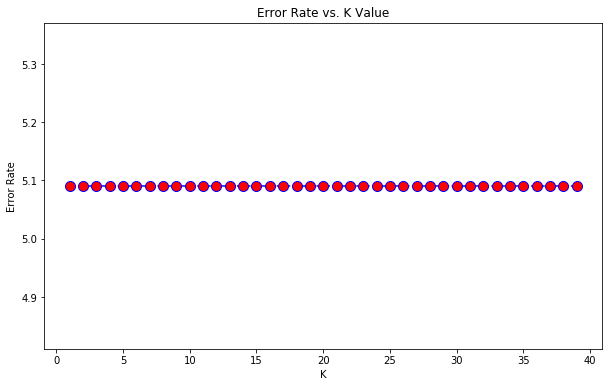

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')